<a href="https://colab.research.google.com/github/FabioNicotra/fabionicotra.github.io/blob/develop/02/temp_name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile price classification
This project was originally assigned during the course *Data Structures in Python* held by Politecnico di Torino in cooperation with Reply IT.

The dataset provided for this project contains information about technical characteristics of mobile phones as well as price ranges. The objective is to analyze the device characteristics and explore their influence on the device price.

Additionally, the project involves implementing different classification models. These models will be used to categorize the devices based on their features and predict their price ranges. The classification models aim to provide insights into how different device characteristics contribute to determining the price.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import csv
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

seed=123456
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## Data Loading

Load the training and test dataset from the csv files.

In [2]:
train_path = 'https://raw.githubusercontent.com/FabioNicotra/fabionicotra.github.io/develop/02/train.csv'
test_path = 'https://raw.githubusercontent.com/FabioNicotra/fabionicotra.github.io/develop/02/test.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

## Exploratory Data Analysis


Visualize the first 5 entries of the dataset

In [3]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In a classification problem in Data Science, the target variable refers to the variable or attribute that we are trying to predict. It represents the class membership of each instance in the dataset. The goal is to build a model that can learn patterns and relationships in the input features to accurately predict the corresponding target variable or class label for new, unseen data points.
In this case, the aim of the market analysis is to classify mobile phones according to their price. Hence, the target variable is `price_range`.

Check for null values

In [4]:
train_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Show info about the dataframe columns, data types, non-null values and memory footprint.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [7]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Show the distribution of features for the different price ranges.

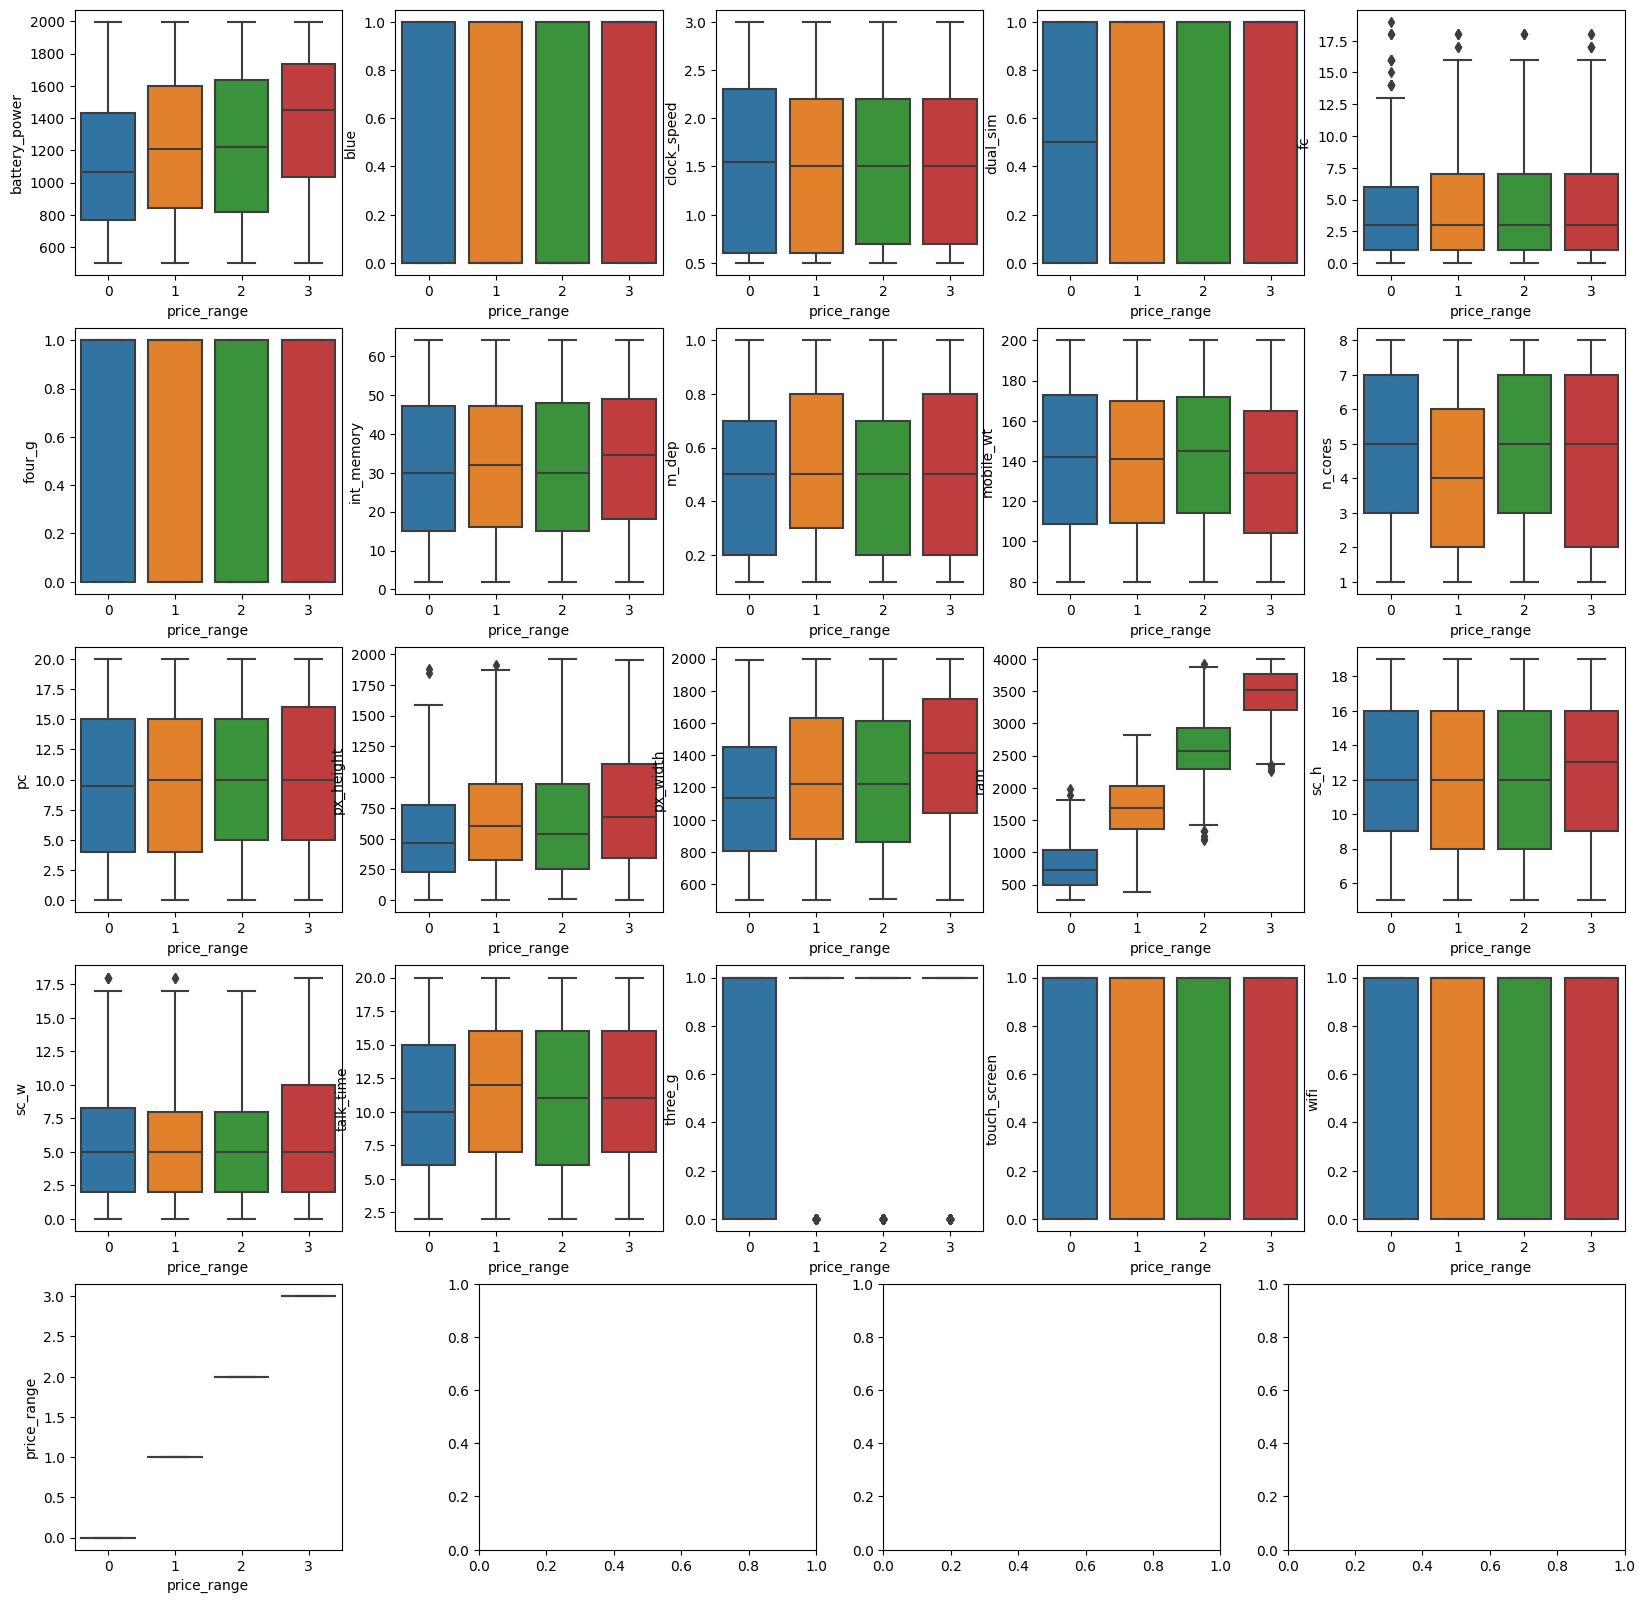

In [8]:
ncol = len(train_df.columns)
fig, axs = plt.subplots(5, 4,figsize=(20, 20))
for col,i in zip(train_df.columns,np.arange(0,ncol)):
    plt.subplot(5,5,i+1)
    sns.boxplot(data=train_df,x='price_range',y=col);

Check whether the dataset is balanced. In a balanced dataset  the number of instances or samples in each class or category is roughly equal or comparable. In other words, all classes have a similar representation within the dataset.

In [9]:
train_df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Calculate the correlation of features and represent it via a heatmap.

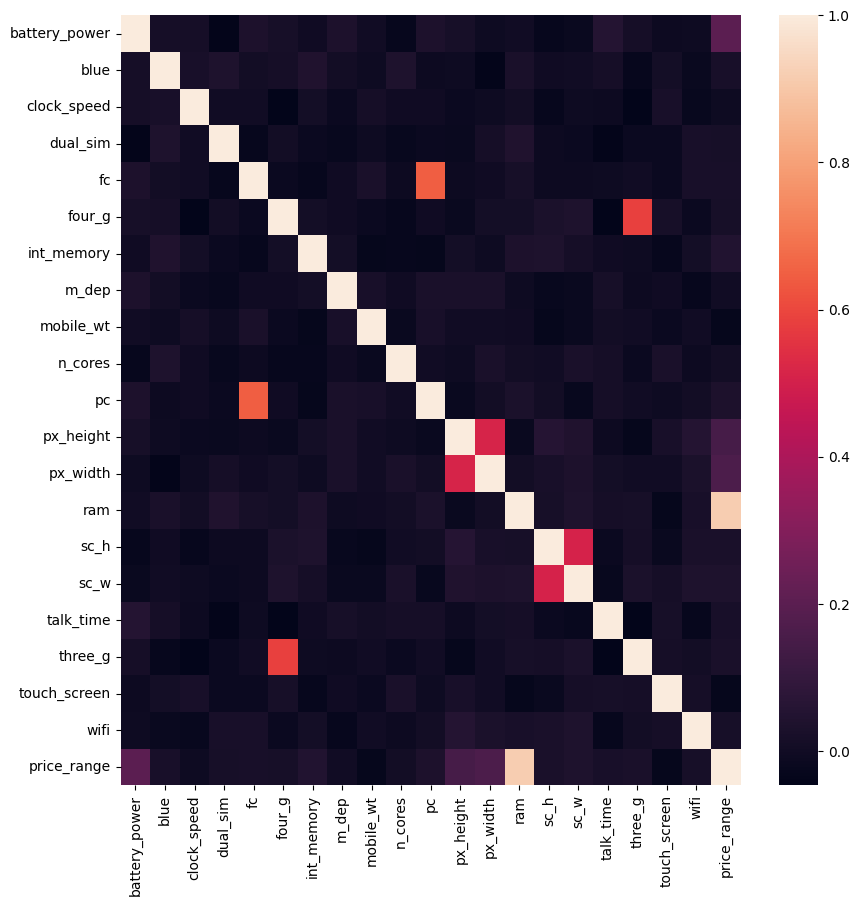

In [10]:
corr_map = train_df.corr(method='pearson')
plt.figure(figsize=(10, 10));
sns.heatmap(corr_map);

## Statistical analysis of features through graphic libraries

Graphical representation of the relationship between `px_width` and `px_height`.

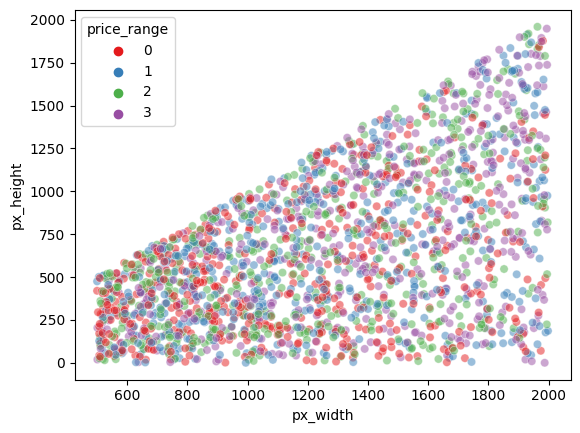

In [11]:
sns.scatterplot(data=train_df,x='px_width',y='px_height',alpha=0.5, hue='price_range',palette='Set1')
plt.show()

Graphical representation of the relationship between `pc` and `fc`

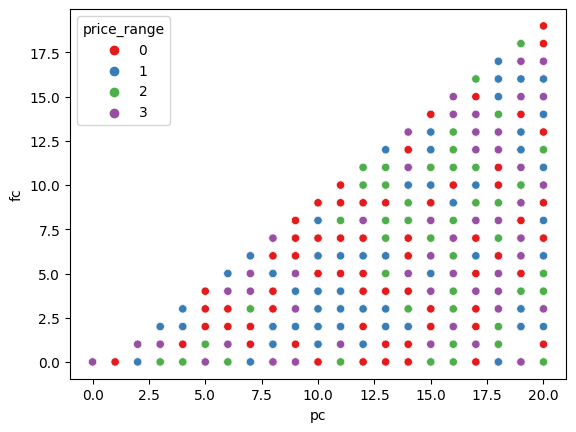

In [12]:
sns.scatterplot(data=train_df,x='pc',y='fc', hue='price_range',palette='Set1')
plt.show()

Number of devices by number of cores

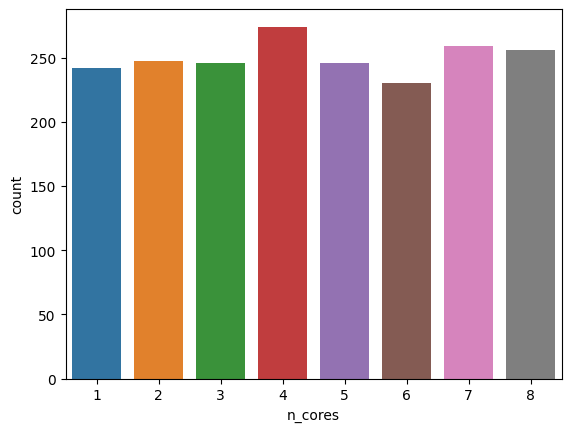

In [13]:
sns.countplot(train_df, x='n_cores')
plt.show()

Calculate the number of devices based on the values of 'four_g' and 'three_g'.

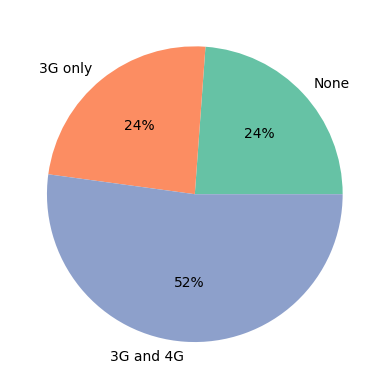

In [14]:
labels = ['None', '3G only', '3G and 4G']
train_df.groupby(['three_g', 'four_g']).size().plot.pie(labels=labels,colors=sns.color_palette('Set2'),autopct='%.0f%%');


## Feature engineering
It can be useful to generate new features by combining the existing ones.




For example, the screen dimension can be obtained by multiplying the screen width and height.

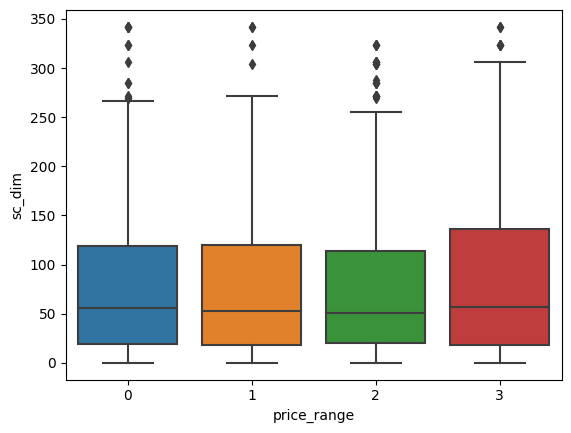

In [15]:
train_df['sc_dim'] = train_df['sc_w']*train_df['sc_h']
sns.boxplot(data=train_df,x='price_range',y='sc_dim');

The screen resolution is obtained by multiplying the number of pixels horizontally by the number of pixels vertically.


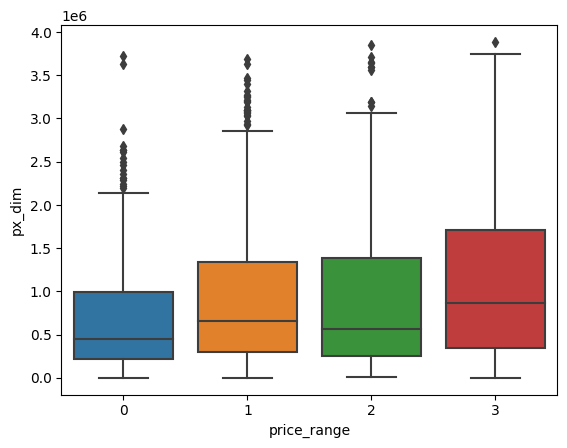

In [16]:
train_df['px_dim'] = train_df['px_width']*train_df['px_height']
sns.boxplot(data=train_df,x='price_range',y='px_dim');

The original features can now be dropped.

In [17]:
train_df = train_df.drop(columns=['sc_w','sc_h','px_width','px_height'])
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,sc_dim,px_dim
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1,63,15120
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2,51,1799140
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2,22,2167308
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2,128,2171776
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1,16,1464096


In [18]:
def transform(df):
    temp_df = df.copy(deep=True)
    temp_df['sc_dim'] = temp_df['sc_w']*temp_df['sc_h']
    temp_df['px_dim'] = temp_df['px_width']*temp_df['px_height']
    new_df = temp_df.drop(columns=['sc_w','sc_h','px_width','px_height'])
    return new_df

Analysis of the correlation on the modified dataset

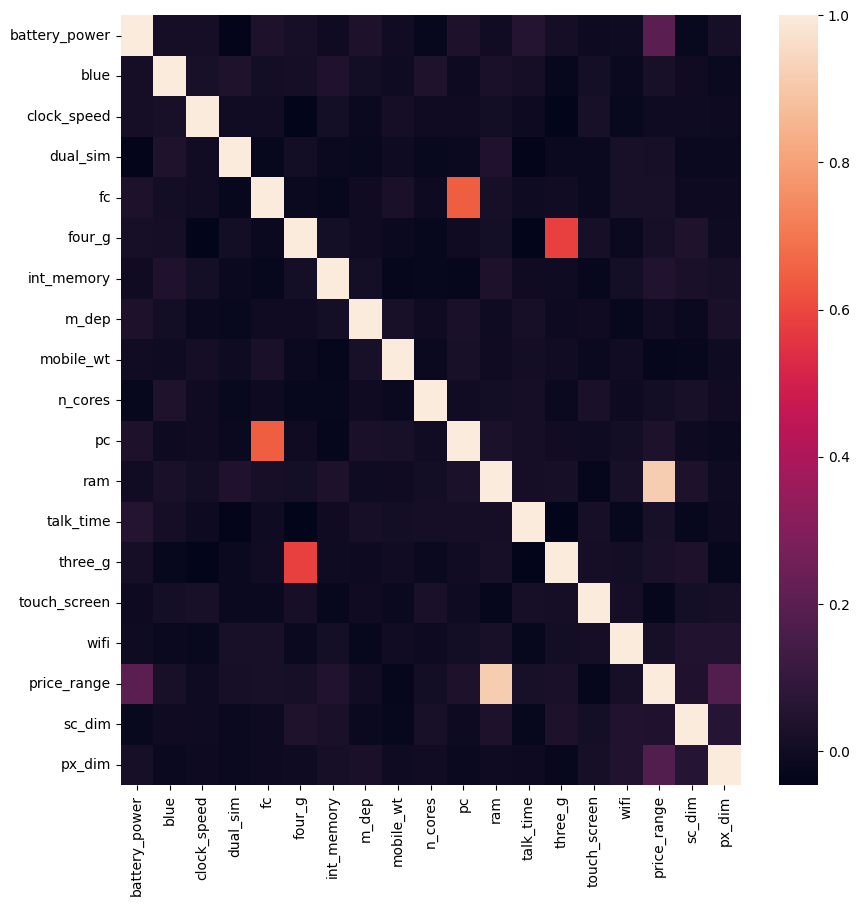

<Figure size 300x300 with 0 Axes>

In [19]:
corr_map = train_df.corr(method='pearson')
plt.figure(figsize=(10, 10));
sns.heatmap(corr_map);
plt.figure(figsize=(3, 3));

## Prepare the Data for Machine Learning Algorithms
The target variable `price_range` is separated from the other features.

In [20]:
y = train_df.price_range
X = train_df.drop('price_range', axis=1)

One of the most important transformations to apply to data is feature scaling. Machine Learning algorithms in general don’t perform well when the input numerical attributes have very different scales.
StandardScaler transforms the distribution of the data so that the mean is 0 and the variance is 1.

In [21]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X.values)
X = pd.DataFrame(X_scaled,columns=X.columns, index=X.index)
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,sc_dim,px_dim
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,0.391703,1.462493,-1.786861,-1.006018,0.986097,-0.224686,-1.073033
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.467317,-0.734267,0.559641,0.994018,-1.014099,-0.380926,1.077541
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,0.441498,-0.368140,0.559641,0.994018,-1.014099,-0.758506,1.521355
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,0.594569,-0.002014,0.559641,-1.006018,-1.014099,0.621614,1.526741
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,-0.657666,0.730240,0.559641,0.994018,-1.014099,-0.836626,0.673657


The training dataset is split into training and validation set in a 70/30 ratio.



In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

All the transformations performed on the training dataframe are replicated on the test dataframe.

In [23]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [24]:
test_df = transform(test_df)
test_df.drop(columns=['id'],inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  ram            1000 non-null   int64  
 12  talk_time      1000 non-null   int64  
 13  three_g        1000 non-null   int64  
 14  touch_screen   1000 non-null   int64  
 15  wifi           1000 non-null   int64  
 16  sc_dim         1000 non-null   int64  
 17  px_dim         1000 non-null   int64  
dtypes: float6

In [25]:
X_scaled = std_scaler.transform(test_df.values)
X_test = pd.DataFrame(X_scaled,columns=test_df.columns, index=test_df.index)

## 12. Classification
Using sklearn implement the following classification models

### Decision Tree

In [26]:
param_grid={"max_depth":[3,4,5],"criterion":['gini','entropy']}
clf=DecisionTreeClassifier(random_state=seed)
gridsearch=GridSearchCV(clf,param_grid,scoring='accuracy',cv=5,n_jobs=-1,error_score=0.0)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [27]:
dt = gridsearch.best_estimator_
fdt = dt.fit(X_train, y_train)

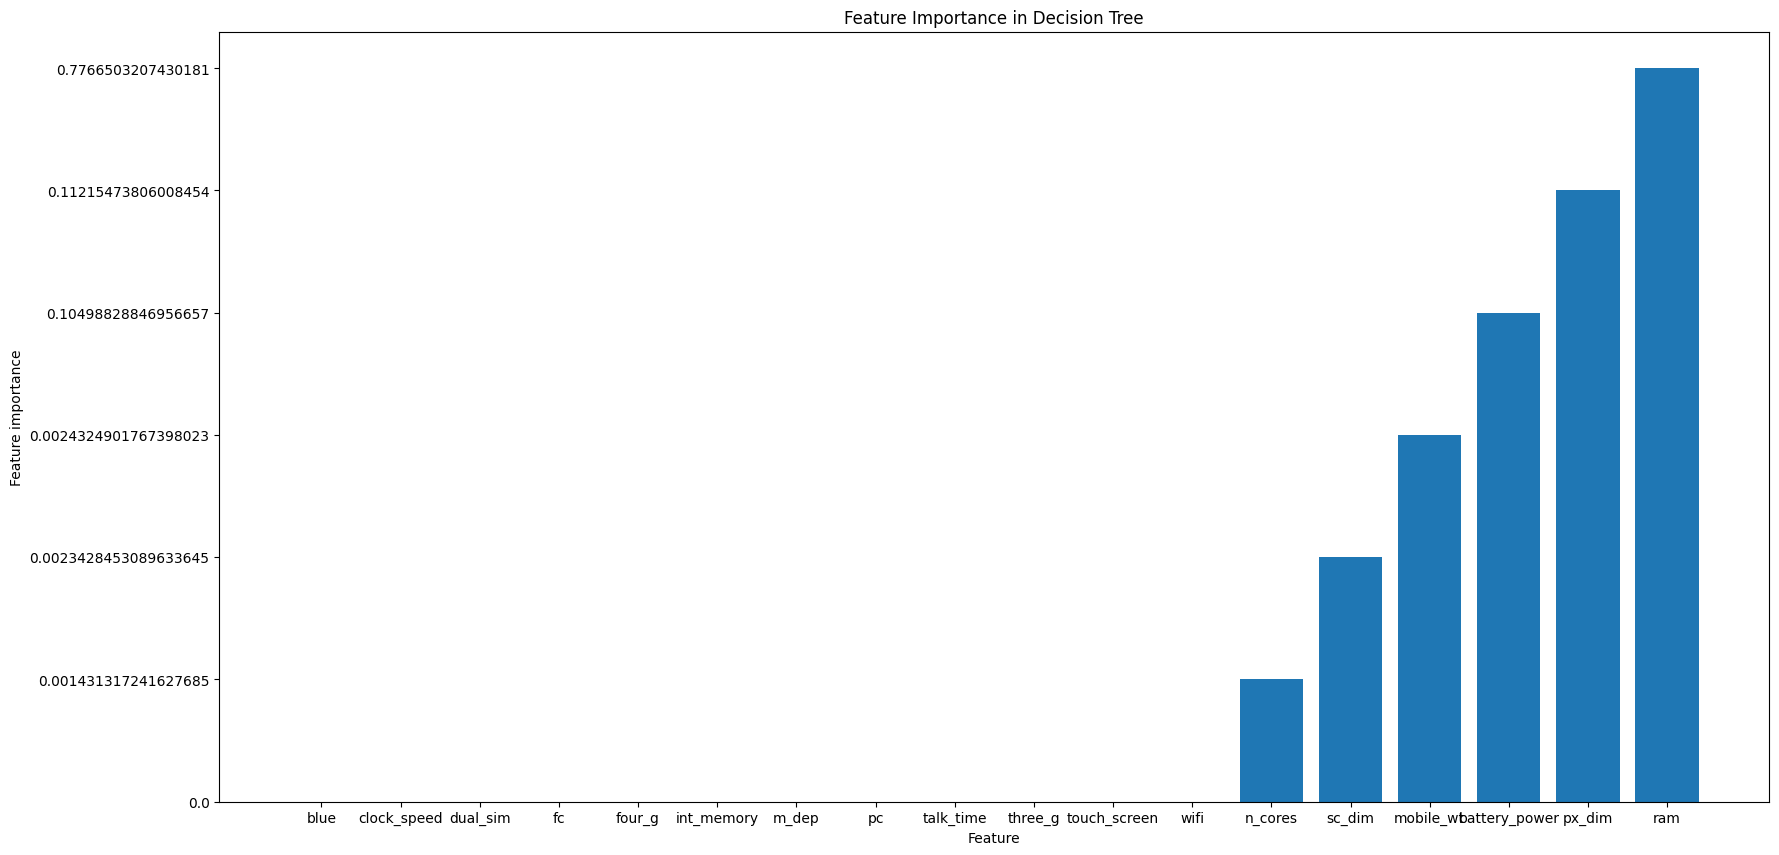

In [28]:
fi=np.array(sorted(zip(X_train.columns, fdt.feature_importances_),key=lambda x: x[1], reverse=False))

fig=plt.figure(figsize=(20,10))
plt.bar(
    x=fi[:,0],
    height=fi[:,1],
    tick_label=fi[:,0]
)
plt.ylabel('Feature importance')
plt.xlabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.show()

In [29]:
y_val_dt = dt.predict(X_val)

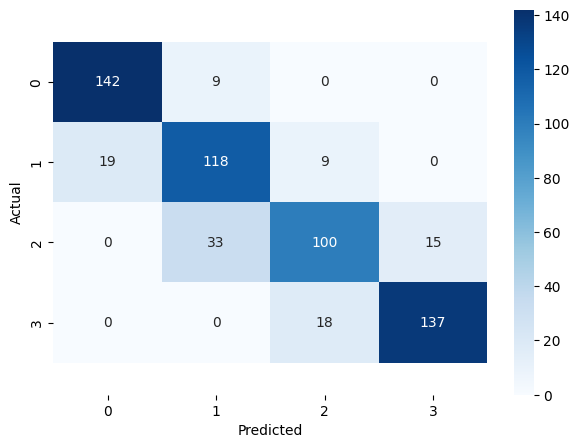

In [42]:
confusion_matrix = pd.crosstab(y_val,y_val_dt,rownames=['Actual'],colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues',fmt=".0f")
a,b=plt.ylim()
a+=0.4
b-=0.4
plt.ylim(a,b)
plt.show()

### Logistic Regression

In [31]:
param_grid={"penalty":['l1','l2'],"fit_intercept":[True, False],"multi_class":['ovr'],"max_iter":[10000]}
clf=LogisticRegression(random_state=seed)
gridsearch=GridSearchCV(clf,param_grid,scoring='accuracy',cv=5,n_jobs=-1,error_score=0.0)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'fit_intercept': True,
 'max_iter': 10000,
 'multi_class': 'ovr',
 'penalty': 'l2'}

In [32]:
lg = gridsearch.best_estimator_
lg.fit(X_train,y_train)

LogisticRegression(max_iter=10000, multi_class='ovr', random_state=123456)

In [33]:
y_val_lg=lg.predict(X_val)

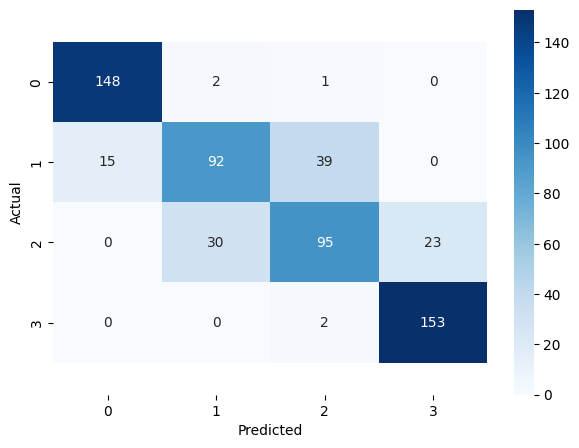

In [43]:
confusion_matrix = pd.crosstab(y_val,y_val_lg,rownames=['Actual'],colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues',fmt=".0f")
a,b=plt.ylim()
a+=0.4
b-=0.4
plt.ylim(a,b)
plt.show()

### Support Vector Machines

In [35]:
param_grid={"C":[0.3,0.5,1],"decision_function_shape":['ovo','ovr'],"kernel":['linear','poly','rbf']}
clf=SVC(random_state=seed)
gridsearch=GridSearchCV(clf,param_grid,scoring='accuracy',cv=5,n_jobs=-1,error_score=0.0)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

{'C': 0.3, 'decision_function_shape': 'ovo', 'kernel': 'linear'}

In [36]:
svc = gridsearch.best_estimator_
svc.fit(X_train,y_train)

SVC(C=0.3, decision_function_shape='ovo', kernel='linear', random_state=123456)

In [38]:
y_val_svc=svc.predict(X_val)

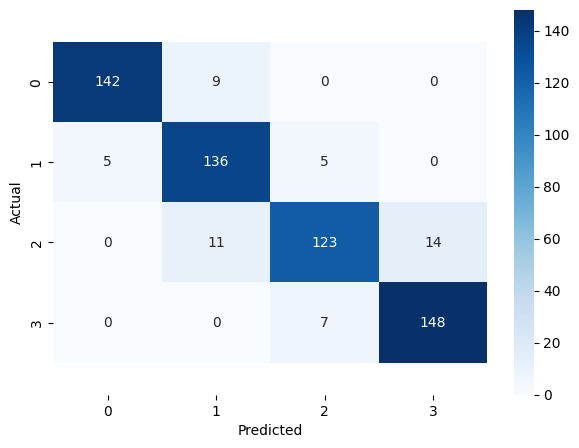

In [44]:
confusion_matrix = pd.crosstab(y_val,y_val_svc,rownames=['Actual'],colnames=['Predicted'])
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues',fmt=".0f")
a,b=plt.ylim()
a+=0.4
b-=0.4
plt.ylim(a,b)
plt.show()

## 13. Compare the end results by their accuracy

In [40]:
conclusion = pd.DataFrame({'Models': ["Decision Tree", "Logistic Regression","Support Vector Classifier"],
                           'Accuracies':[accuracy_score(y_val,y_val_dt),accuracy_score(y_val,y_val_lg),accuracy_score(y_val,y_val_svc)]})
conclusion

,Models,Accuracies
0,Decision Tree,0.828333
1,Logistic Regression,0.813333
2,Support Vector Classifier,0.915000


## (Optional)

## 14. LDA
Use LDA to achieve dimensionality reduction

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=None)

x_lda = lda.fit(x,y).transform(x)

In [ ]:
lda.explained_variance_ratio_

#### Linear Discriminant Analysis

## 15. Classification with feature extraction

### Decision Tree

### Logistic Regression

### Support Vector Machines

## 16. Compare the end results by their accuracy